In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math
import glob
import cmath
#import cfalcon
import subprocess
import numpy as np
from py_unsio import *
import scipy.special as sp
from numpy import exp, sqrt
import wkbl.astro.nbody_essentials as nbe
import scipy.integrate as integrate
from sklearn.neighbors import KDTree
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cfalcon
CF =cfalcon.CFalcon()

In [3]:
uns = CunsIn('/data/mySnaps/Bo1_h1_SF1.g2',"halo,stars,gas","all",False)

In [78]:
ok = uns.nextFrame("")
ok, pos_dm = uns.getArrayF("halo","pos")
ok, vel_dm = uns.getArrayF("halo","vel")
ok, mass_dm = uns.getArrayF("halo","mass")
ok, pos_st = uns.getArrayF("stars","pos")
ok, vel_st = uns.getArrayF("stars","vel")
ok, mass_st = uns.getArrayF("stars","mass")
ok, pos_gs = uns.getArrayF("gas","pos")
ok, vel_gs = uns.getArrayF("gas","vel")
ok, mass_gs = uns.getArrayF("gas","mass")

In [79]:
pos3d = pos_dm.reshape(len(pos_dm)/3,3)
pos3d_st = pos_st.reshape(len(pos_st)/3,3)
pos3d_gs = pos_gs.reshape(len(pos_gs)/3,3)

In [95]:
edges = np.linspace(-10,10,100)
x ,y, z = pos3d[:,0],pos3d[:,1],pos3d[:,2]
x_s ,y_s, z_s = pos3d_st[:,0],pos3d_st[:,1],pos3d_st[:,2]
x_gs ,y_gs, z_gs = pos3d_gs[:,0],pos3d_gs[:,1],pos3d_gs[:,2]

selection = (np.abs(z)<10)
H, xedges, yedges = np.histogram2d(x[selection], z[selection], bins=(edges, edges),
                                   weights=mass_dm[selection])
dm_faceon = H.T
H, xedges, yedges = np.histogram2d(x_s, z_s, bins=(edges, edges),
                                   weights=mass_st)
st_faceon = H.T

H, xedges, yedges = np.histogram2d(x_gs, z_gs, bins=(edges, edges),
                                   weights=mass_gs)
gs_faceon = H.T

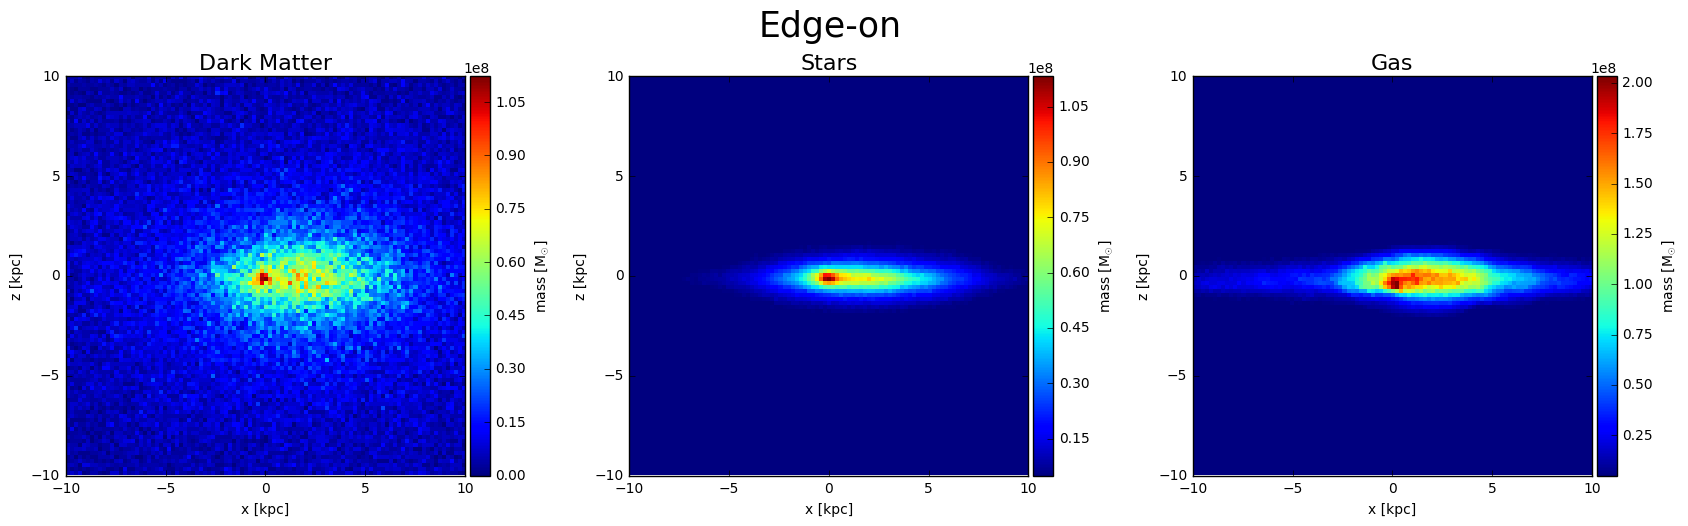

In [96]:
fig,[ax,ax1,ax2] = plt.subplots(1,3,figsize=[17,5])

mass_1 = ax.imshow(dm_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax1.imshow(st_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],vmin=5e6)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')

mass_3 = ax2.imshow(gs_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],vmin=5e6)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_3,cax=cax,label=r'mass [M$_{\odot}$]')

ax.set_xlabel("x [kpc]")
ax.set_ylabel("z [kpc]")
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("z [kpc]")
ax2.set_xlabel("x [kpc]")
ax2.set_ylabel("z [kpc]")
ax1.text(-3.5,12,"Edge-on",fontsize=25)

ax.set_title("Dark Matter",fontsize=16)
ax1.set_title("Stars",fontsize=16)
ax2.set_title("Gas",fontsize=16)


fig.tight_layout(w_pad=1.5)

In [98]:
edges = np.linspace(-10,10,100)
x ,y, z = pos3d[:,0],pos3d[:,1],pos3d[:,2]
x_s ,y_s, z_s = pos3d_st[:,0],pos3d_st[:,1],pos3d_st[:,2]
x_gs ,y_gs, z_gs = pos3d_gs[:,0],pos3d_gs[:,1],pos3d_gs[:,2]

selection = (np.abs(z)<10)
H, xedges, yedges = np.histogram2d(x[selection], y[selection], bins=(edges, edges),
                                   weights=mass_dm[selection])
dm_faceon = H.T
H, xedges, yedges = np.histogram2d(x_s, y_s, bins=(edges, edges),
                                   weights=mass_st)
st_faceon = H.T

H, xedges, yedges = np.histogram2d(x_gs, y_gs, bins=(edges, edges),
                                   weights=mass_gs)
gs_faceon = H.T

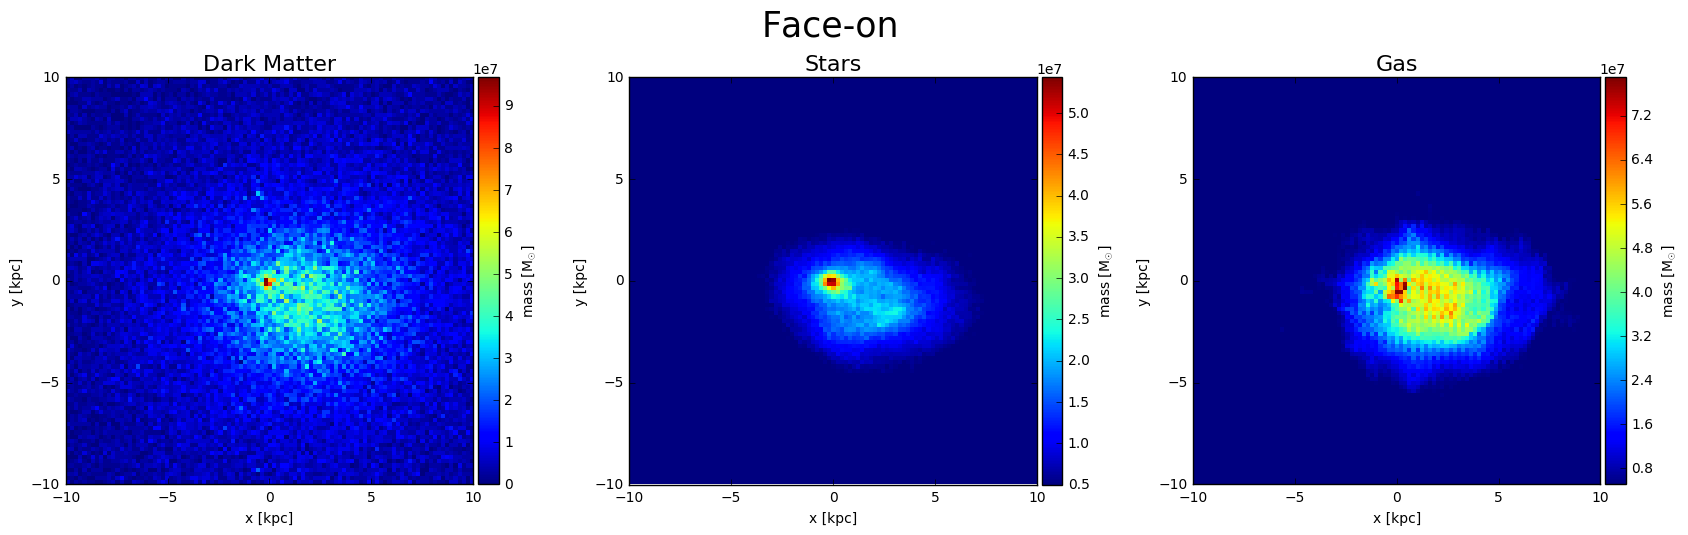

In [99]:
fig,[ax,ax1,ax2] = plt.subplots(1,3,figsize=[17,5])

mass_1 = ax.imshow(dm_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax1.imshow(st_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],vmin=5e6)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')

mass_3 = ax2.imshow(gs_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],vmin=5e6)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_3,cax=cax,label=r'mass [M$_{\odot}$]')

ax.set_xlabel("x [kpc]")
ax.set_ylabel("y [kpc]")
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax2.set_xlabel("x [kpc]")
ax2.set_ylabel("y [kpc]")
ax1.text(-3.5,12,"Face-on",fontsize=25)
ax.set_title("Dark Matter",fontsize=16)
ax1.set_title("Stars",fontsize=16)
ax2.set_title("Gas",fontsize=16)


fig.tight_layout(w_pad=1.5)

In [106]:
print "max = ",mass_dm.max()
print "min = ",mass_dm.min()
print len(mass_dm[mass_dm==mass_dm.max()])
print pos3d[mass_dm==mass_dm.max()]

max =  9.83667e+07
min =  1.53698e+06
2
[[-291.17492676 -367.51452637   22.83422279]
 [-342.54653931 -354.09011841  145.06895447]]


In [108]:
r = np.sqrt(pos3d[:,0]**2 + pos3d[:,1]**2 + pos3d[:,2]**2 )
xedges, yedges = np.histogram(mass_dm[r<15])

<Container object of 10 artists>

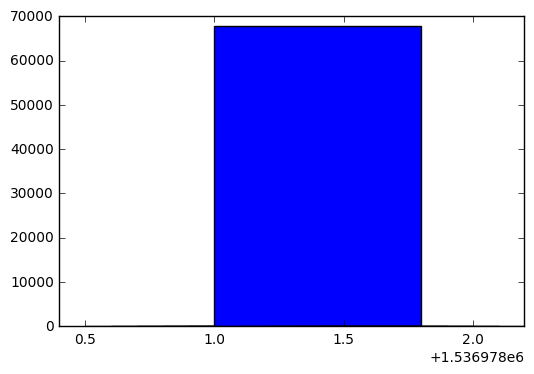

In [110]:
fig, ax = plt.subplots()
ax.bar(yedges[:-1],xedges)

In [111]:
print xedges

[    0     0     0     0     0 67824     0     0     0     0]


In [115]:
ok,rho_dm,_= CF.getDensity(np.array(pos3d.reshape(len(pos3d)*3),dtype=np.float32), mass_dm)

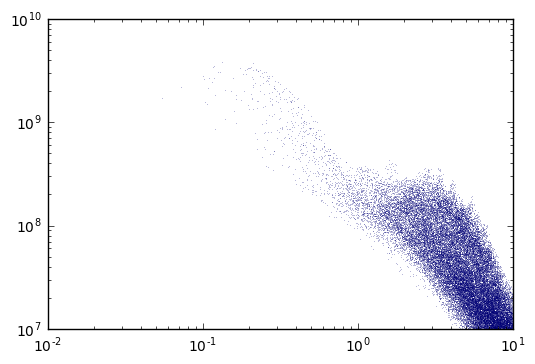

In [123]:
fig, ax = plt.subplots()
ax.set_xlim([1e-2,10])
ax.set_ylim([1e7,1e10])


ax.scatter(r,rho_dm, s=0.1, lw=0)
ax.set_xscale("log")
ax.set_yscale("log")

In [118]:
print pos3d[r==r.min()]

[[-0.03865515 -0.01994815  0.03301712]]


In [119]:
print r.min()

0.0546102
